#### <span style="color:GoldenRod "> Import modules </span>

In [26]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
from scipy import constants as sc
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

### Re: The Saha-Boltzmann equation

#### Original Saha equation

In [211]:
Ui = 13.6*sc.electron_volt #Hydrogen. Remember, the usual T-rho diagram is for hydrogen
Ts = np.logspace(2,10,100)
ns = []
for T in Ts:
    n = 2*2.4e21*T**(3/2)*np.exp(-Ui/(sc.k*T))
    ns = ns+[n]
    
ns = np.array(ns)
    
# ns = np.array([n if 1e12<n<1e29 else np.nan for n in ns])

<ipython-input-212-581d9cf64bc2>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(ns*sc.m_p*1e-3), np.log10(Ts), color='red', linewidth=3)


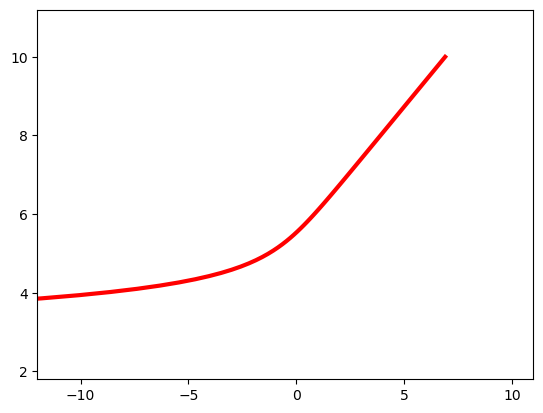

In [212]:
plt.plot(np.log10(ns*sc.m_p*1e-3), np.log10(Ts), color='red', linewidth=3)
plt.xlim([-12, 11])
plt.ylim([1.8, 11.2])
plt.show()

### Calculating the average charge thanks to the Thomas-Fermi model

**Note:** This is not actually the Thomas-Fermi model, which requires serious computations to solve.
This is a fit of the result of the Thomas-Fermi model, which is used here for pedagocial purposes.
The fit is given in the classic textbook by _Atzeni & Meyer-ter-vehn: The Physics of Inertial Fusion_. The authors took it, in turn, from [_Pressure Ionization, Resonances, and the Continuity of Bound and Free States - More (1985)_](https://doi.org/10.1016/S0065-2199(08)60145-1)

In [205]:
def Zav_TF(Z, A, rho, T):
    """
    Finite Temperature Thomas Fermi Charge State using 
    R.M. More (1985), "Pressure Ionization, Resonances, and the
    Continuity of Bound and Free States", Adv. in Atomic 
    Mol. Phys., Vol. 21, p. 332 (Table IV).
    
    Z = atomic number
    rho = mass density (g/cc)
    T = temperature (eV)
    """

    alpha = 14.3139
    beta = 0.6624
    a1 = 0.003323
    a2 = 0.9718
    a3 = 9.26148e-5
    a4 = 3.10165
    b0 = -1.7630
    b1 = 1.43175
    b2 = 0.31546
    c1 = -0.366667
    c2 = 0.983333
    
    rho1 = rho/ A*Z
    T1 = T/Z**(4./3.)
    Tf = T1/(1 + T1)
    Ac = a1*T1**a2 + a3*T1**a4
    B = -np.exp(b0 + b1*Tf + b2*Tf**7)
    C = c1*Tf + c2
    Q1 = Ac*rho1**B
    Q = (rho1**C + Q1**C)**(1/C)
    x = alpha*Q**beta

    return Z*x/(1 + x + np.sqrt(1 + 2.*x))

#### Evidence of pressure ionisation at T=0

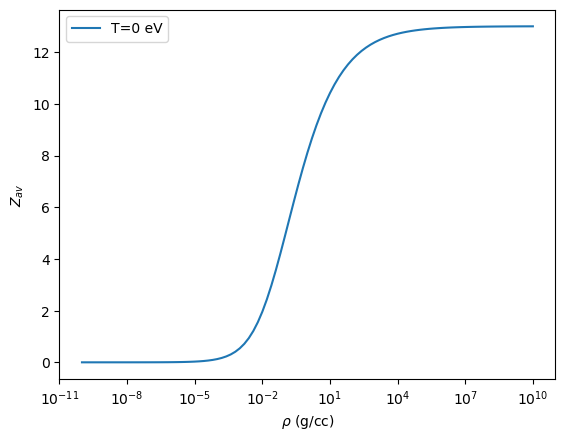

In [115]:
# Aluminium
A = 27
Z = 13

rho_list = np.logspace(-10,10,101)
T = 0

Zav_list = []
for rho in rho_list:
    Zav = Zav_TF(Z, A, rho, T)
    Zav_list.append([Zav])
    
plt.plot(rho_list, Zav_list, label=f"T={T:0.1g} eV")
plt.semilogx()
plt.xlabel(r'$\rho$ (g/cc)')
plt.ylabel(r'$Z_{av}$')
plt.legend()


plt.show()

#### Temperature ionisation, recombination, and pressure ionisation - at any Temperature

In [116]:
# Aluminium
A = 27
Z = 13

rho_list = np.logspace(-10,10,101)
T_list = np.logspace(-3,5,9)

Zav_metalist = []
for T in T_list:
    Zav_list = []
    for rho in rho_list:
        Zav = Zav_TF(Z, A, rho, T)
        Zav_list.append([Zav])
    Zav_metalist.append([Zav_list])

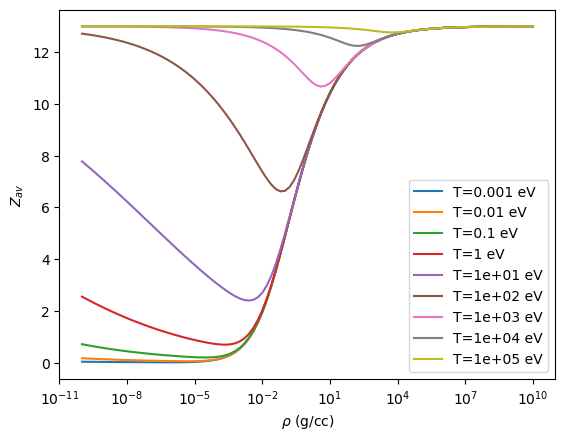

In [117]:
for j in range(0, len(T_list)):
    plt.plot(rho_list, Zav_metalist[j][0], label=f"T={T_list[j]:0.1g} eV")
    plt.semilogx()
    plt.xlabel(r'$\rho$ (g/cc)')
    plt.ylabel(r'$Z_{av}$')
    plt.legend()
    
    
plt.show()

#### Failed attempt at plotting the 50% ionisation line in the T-n diagram

##### Test:

In [182]:
Z = 13
A = 27
rho = 1e-2 #[g/cc]

def func(Tx):
    return Zion_TF(Z, A, rho, Tx) - Z/2 #When this is 0, it means 50% ionisation: Zav = Z/2

In [186]:
root = fsolve(func, x0=1e-2)
print(f"50% ionisation for T={root[0]:0.1g} eV")
func(root) #This should be 0, if the root is correct

50% ionisation for T=8e+01 eV


array([-8.8817842e-16])

##### 50% ionisation line in T-n space

In [202]:
Z = 1
A = 1
rho_list = np.logspace(-10,2,101)

rho_50percent_list = []
T_50percent_list = []
for rho in rho_list:
    def func(Tx):
        return Zion_TF(Z, A, rho, Tx) - Z/2 #When this is 0, it means 50% ionisation: Zav = Z/2
    root = fsolve(func, x0=1e-2)    
#     print (f"For rho={rho:0.1g} [g/cc], the estimation is {func(root)}, which should be close to 0")
    root_list.append([root])
    if abs(func(root)[0])<0.1:
        rho_50percent_list.append(rho)
        T_50percent_list.append(root[0])

<ipython-input-27-9fad9fbc3e73>:28: RuntimeWarning: invalid value encountered in power
  Ac = a1*T1**a2 + a3*T1**a4


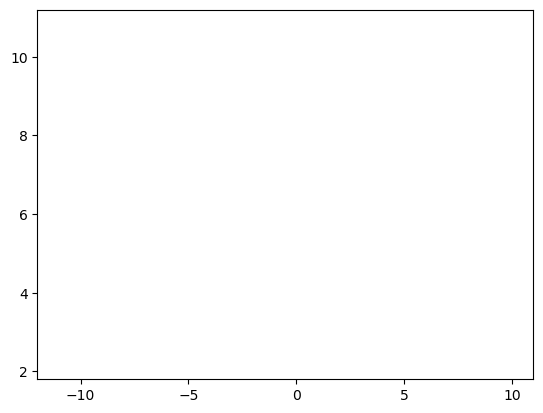

In [203]:
plt.plot(np.log10(rho_50percent_list), np.log10(T_50percent_list), color='red', linewidth=3)
plt.xlim([-12, 11])
plt.ylim([1.8, 11.2])
plt.show()